In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), '../../'))

In [3]:
from scripts.data_loading import load_dataset
from scripts.data_description import *
from scripts.text_analysis import *
from scripts.time_series_analysis import *


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kaleb/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
data = load_dataset('../../data/raw_analyst_ratings.csv')


In [5]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

## Descriptive Statistics

In [7]:
df, headline_stats, headline_length_column = calculate_and_describe_column_length(data, 'headline')

In [8]:
headline_stats


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [9]:
df.head()

,headline,url,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [10]:
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [11]:
df.head()

,headline,url,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


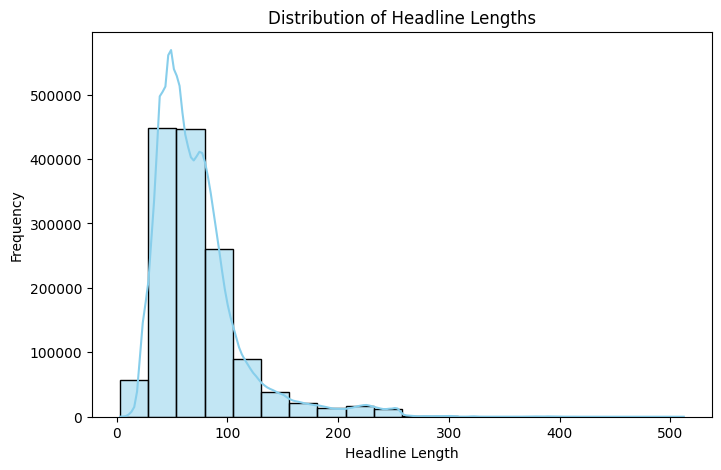

In [12]:
plot_distribution(
    df, 
    headline_length_column, 
    title="Distribution of Headline Lengths", 
    xlabel="Headline Length", 
    ylabel="Frequency", 
    color='skyblue'
)

### Publisher Analysis


Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


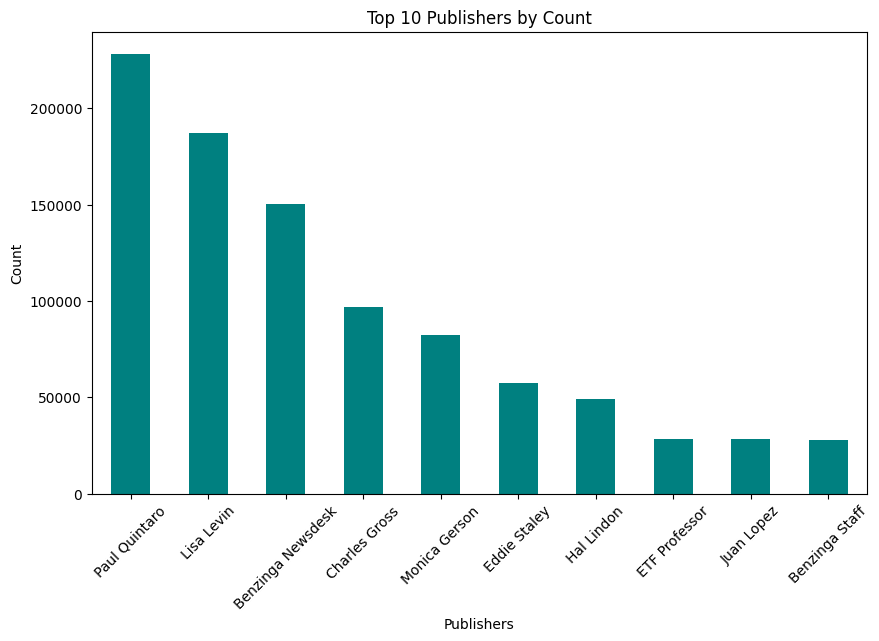

In [13]:
publisher_counts = count_values(df, 'publisher')
print("\nTop Publishers:")
print(publisher_counts.head(10))
plot_top_values(publisher_counts, column_name='Publishers')

/tmp/ipykernel_76138/710755721.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df[date_column].dt.to_period('M')


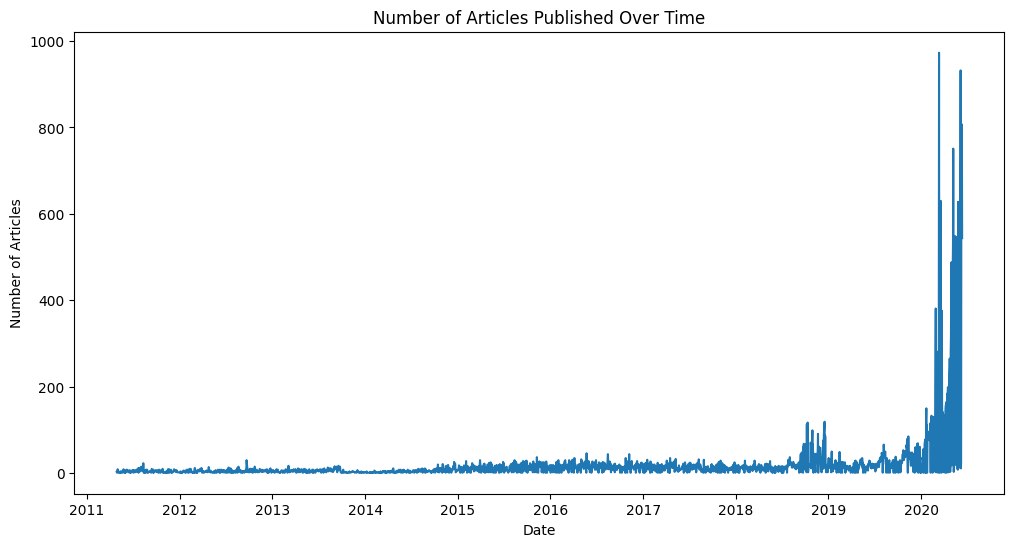

In [14]:
def extract_date_features(df, date_column):
    """
    Extract and analyze date-related features from the dataset.
    """
    df[date_column] = pd.to_datetime(df[date_column], utc=True, errors='coerce')
    df['day'] = df[date_column].dt.date
    df['month'] = df[date_column].dt.to_period('M')
    df['day_of_week'] = df[date_column].dt.day_name()
    return df
df = extract_date_features(df, 'date')

plot_time_series(
    df, 
    'day', 
    title="Number of Articles Published Over Time", 
    xlabel="Date", 
    ylabel="Number of Articles"
)

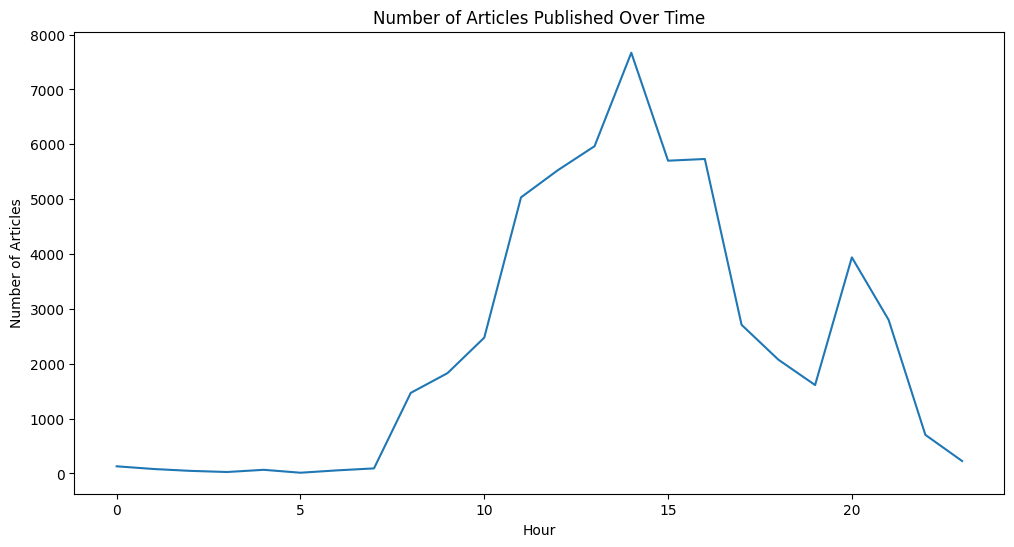

In [26]:
plot_time_series(
    df, 
    'hour', 
    title="Number of Articles Published Over Time", 
    xlabel="Hour",
    ylabel="Number of Articles"
)

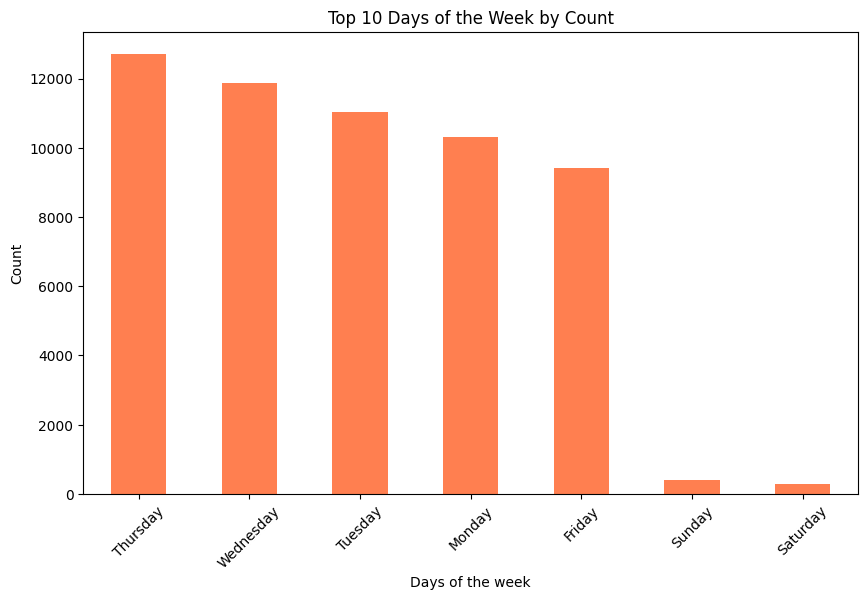

In [15]:
plot_top_values(
    count_values(df, 'day_of_week'), 
    column_name="Days of the Week", 
    color='coral'
)

# Sentiment Analysis and Topic Modeling

In [16]:
perform_topic_modeling(df.iloc[:1000, :], 'headline')

Topic 1:
['adj', 'target', 'price', 'technologies', 'sees', 'sales', 'agilent', 'eps', 'est', 'vs']
Topic 2:
['stanley', 'company', 'raises', 'reports', 'update', 'pt', 'upgrades', 'morgan', 'technologies', 'agilent']
Topic 3:
['11', 'market', 'lower', 'higher', 'healthcare', 'companies', 'china', 'trading', 'shares', 'agilent']
Topic 4:
['15', '14', 'august', 'benzinga', 'november', 'market', 'scheduled', 'watch', 'stocks', 'earnings']
Topic 5:
['initiates', 'lowers', 'bank', '00', 'buy', 'raises', 'maintains', 'pt', 'technologies', 'agilent']


/home/kaleb/projects/kaim/KAIM-Week1/notebooks/eda/../../scripts/text_analysis.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df[text_column].apply(lambda x: sia.polarity_scores(x)['compound'])
/home/kaleb/projects/kaim/KAIM-Week1/notebooks/eda/../../scripts/text_analysis.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = pd.cut(df['sentiment_score'], bins=[-1, -0.05, 0.05, 1], labels=['negative', 'neutral', 'positive'])


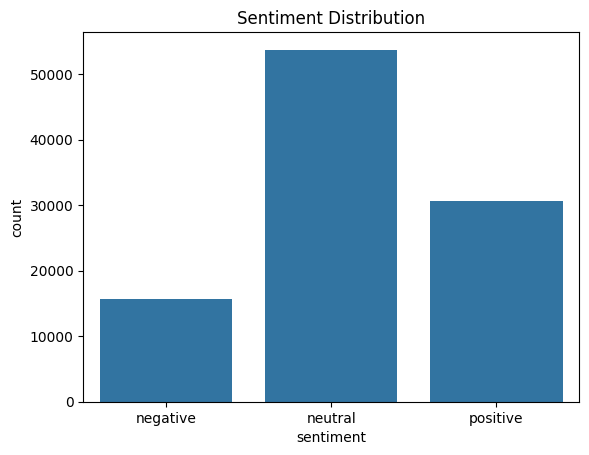

,headline,url,publisher,date,stock,headline_length,day,month,day_of_week,sentiment_score,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-06-05,2020-06,Friday,0.0000,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-06-03,2020-06,Wednesday,0.0000,neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-05-26,2020-05,Tuesday,0.0000,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-05-22,2020-05,Friday,0.0000,neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-05-22,2020-05,Friday,0.2960,positive
...,...,...,...,...,...,...,...,...,...,...,...
99995,"Intuit, ASML Holding, and STMicroelectronics A...",https://www.benzinga.com/news/11/03/912126/int...,Benzinga Staff,NaT,ASML,92,NaT,NaT,NaN,0.0000,neutral
99996,ING Group Opens ASML With Buy,https://www.benzinga.com/analyst-ratings/new-c...,Lisa Levin,NaT,ASML,29,NaT,NaT,NaN,0.0000,neutral
99997,"Benzinga's Top Pre-Market NASDAQ Losers (ARMH,...",https://www.benzinga.com/news/11/02/876915/ben...,Monica Gerson,NaT,ASML,64,NaT,NaT,NaN,-0.3818,negative
99998,Benzinga's Top Pre-Market NASDAQ Gainers (ERIC...,https://www.benzinga.com/Markets/11/01/804291/...,Monica Gerson,NaT,ASML,65,NaT,NaT,NaN,0.2023,positive


In [17]:
perform_sentiment_analysis(df.iloc[:100000, :], 'headline')

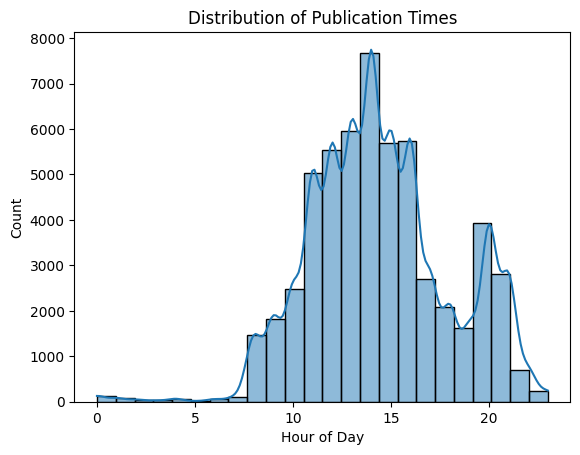

In [18]:
analyze_publication_times(df, 'date')

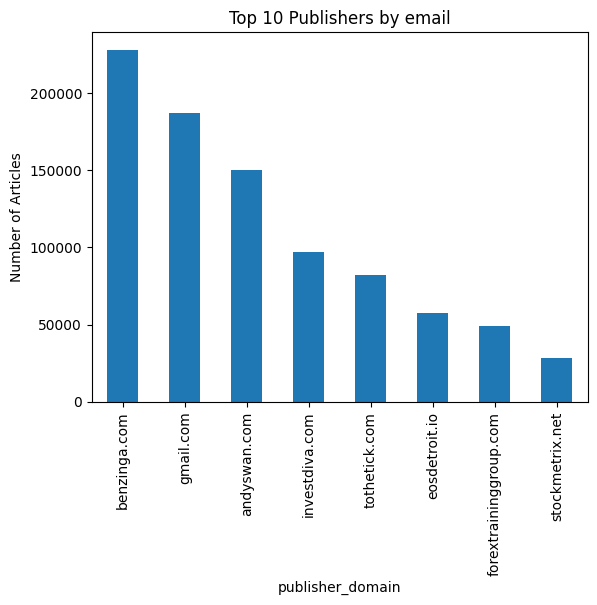

In [19]:
analyze_publishers(df, 'publisher')

In [ ]:
df.head()

,headline,url,publisher,date,stock,headline_length,day,month,day_of_week,hour,publisher_domain
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-06-05,2020-06,Friday,14.0,NaN
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-06-03,2020-06,Wednesday,14.0,NaN
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-05-26,2020-05,Tuesday,8.0,NaN
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-05-22,2020-05,Friday,16.0,NaN
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-05-22,2020-05,Friday,15.0,NaN
